# Example: Iris Flower Dataset

-   The [Iris Flower
    dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set),
    introduced by the British biologist and statistician [Ronald A.
    Fisher](https://en.wikipedia.org/wiki/Ronald_Fisher) in 1936, serves
    as a benchmark dataset in the field of pattern recognition and
    machine learning.

-   This dataset comprises 150 instances of iris flowers, each belonging
    to one of three species: **setosa, versicolor, or virginica**.

-   **Four measured features**: sepal length, sepal width, petal length,
    and petal width, all in centimeters \[scikit-learn Developers,
    2023\].


<center>
<img src="https://miro.medium.com/max/3500/1*f6KbPXwksAliMIsibFyGJw.png" alt="picture" width="700">
<br>
<b>Figure</b>: Image sourced
from Kaggle.com
</center>


In [5]:
import pandas as pd
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
print(iris['DESCR'])
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target_names[iris.target]

# Display the Iris dataset
display(iris_df)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


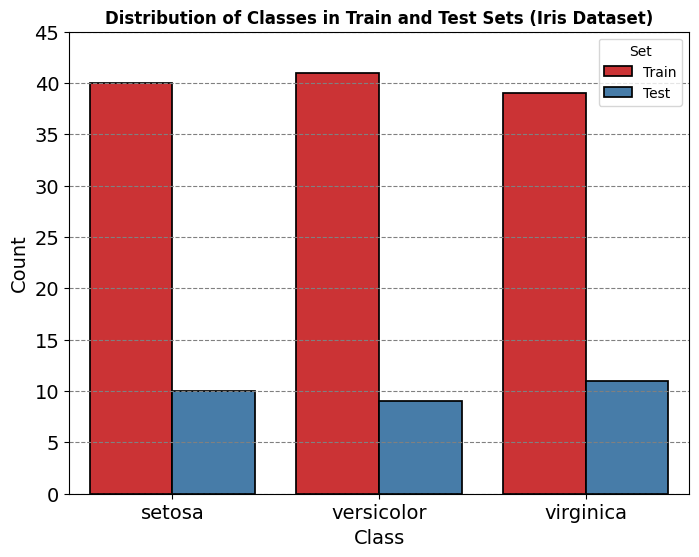

In [6]:
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

# Use a custom style for the plot (adjust the path to your style file)
plt.style.use('https://raw.githubusercontent.com/HatefDastour/ENSF444/main/Files/mystyle.mplstyle')

# Perform the train-test split
X = iris_df.drop('species', axis=1)  # Features
y = iris_df['species']  # Labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create dataframes for train and test sets
train_data = pd.DataFrame({'Set': 'Train', 'Class': y_train})
test_data = pd.DataFrame({'Set': 'Test', 'Class': y_test})

# Combine the training and testing sets for visualization using pd.concat
combined_data = pd.concat([train_data, test_data], ignore_index=True)

# Create a bar plot
fig, ax = plt.subplots(figsize=(8, 6))
sns.countplot(x='Class', hue='Set', ec='k', lw=1.25, data=combined_data, palette='Set1', ax=ax)

# Set plot properties
ax.set_title('Distribution of Classes in Train and Test Sets (Iris Dataset)', weight='bold')
ax.set(xlabel='Class', ylabel='Count', ylim=[0, 45])

# Show the plot
plt.show()

<font color='Blue'><b>Example</b></font>: Returning to the Iris dataset, we employ a cross-validation strategy with a 5-fold partitioning scheme. In this approach, the dataset is divided into five subsets of roughly equal size, and the model is trained and evaluated five times. Each time, a different subset is held out as the test set, while the remaining four subsets are combined to form the training set. This process ensures that every data point is used for both training and testing, leading to a more robust evaluation of the model's performance.

In [7]:
# Use groupby to count observations by species
species_counts = iris_df.groupby('species').size().to_frame('Count')

print("Number of Observations by Species:")
display(species_counts.T)

Number of Observations by Species:


species,setosa,versicolor,virginica
Count,50,50,50


In [10]:
import numpy as np
from sklearn.model_selection import KFold

def print_bold(txt):
    print("\033[1;34m" + txt + "\033[0m")

def print_bold(txt):
    print("\033[1;34m" + txt + "\033[0m")

n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Perform Cross-Validation
for C, (train_idx, test_idx) in enumerate(kf.split(X)):
    print_bold(f'Fold {C + 1}:')

    # Extract target names for train and test sets
    train_targets = iris.target_names[iris.target][train_idx]
    test_targets = iris.target_names[iris.target][test_idx]

    # Create DataFrames for train and test sets
    df_train = pd.Series(train_targets).value_counts().to_frame('').T
    df_train.insert(0, "Set", ['Train'])

    df_test = pd.Series(test_targets).value_counts().to_frame('').T
    df_test.insert(0, "Set", ['Test'])

    # Concatenate DataFrames
    df_concat = pd.concat([df_train, df_test])

    # Define styles for the data rows
    styles = [{'selector': 'tbody tr:nth-child(1)', 'props': [('background-color', '#f0fff0')]},
              {'selector': 'tbody tr:nth-child(2)', 'props': [('background-color', '#cfe2f3')]}]

    # Apply styles to the DataFrame and display it
    display(df_concat.style.set_table_styles(styles))

Fold 1:


,Set,versicolor,setosa,virginica
,Train,41,40,39
,Test,9,10,11


Fold 2:


,Set,virginica,versicolor,setosa
,Train,43,40,37
,Test,7,10,13


Fold 3:


,Set,virginica,versicolor,setosa
,Train,42,40,38
,Test,8,10,12


Fold 4:


,Set,setosa,versicolor,virginica
,Train,42,40,38
,Test,8,10,12


Fold 5:


,Set,setosa,versicolor,virginica
,Train,43,39,38
,Test,7,11,12


When working with a small dataset like the Iris dataset, which has only 150 samples, the choice of cross-validation strategy becomes even more crucial. Using StratifiedKFold for splitting a small dataset into train and test sets offers several benefits:

1. **Preserving Data Distribution**: The Iris dataset contains three classes (species) with 50 samples each. If you use simple random splitting without stratification, there's a chance that one or more classes might be underrepresented or absent in either the train or test set. StratifiedKFold ensures that each fold maintains the original class distribution, which is particularly important when working with a limited number of samples.

2. **More Reliable Performance Estimates**: In small datasets, individual data points can have a larger impact on model training and evaluation. By using stratification, you're making sure that each fold accurately represents the underlying data distribution. This leads to more reliable performance estimates and reduces the risk of overfitting or underestimation.

3. **Preventing Overfitting**: Small datasets are prone to overfitting, especially if you're using a complex model. Using stratified cross-validation helps in mitigating this risk by providing consistent evaluation across folds and ensuring that each fold has a representative distribution of classes.

4. **Robustness to Variability**: Small datasets often have more variability in terms of data distribution and noise. StratifiedKFold provides a way to handle this variability by maintaining class balance, leading to a more stable evaluation process.

5. **Comparable Results**: StratifiedKFold ensures that performance metrics are calculated over similar data distributions for each fold. This makes your results more comparable and interpretable.

In [11]:
from sklearn.model_selection import StratifiedKFold
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

def print_bold(txt):
    print("\033[1;31m" + txt + "\033[0m")

# Perform Cross-Validation
for C, (train_idx, test_idx) in enumerate(skf.split(X, y)):
    print_bold(f'Fold {C + 1}:')

    # Extract target names for train and test sets
    train_targets = iris.target_names[iris.target][train_idx]
    test_targets = iris.target_names[iris.target][test_idx]

    # Create DataFrames for train and test sets
    df_train = pd.Series(train_targets).value_counts().to_frame('').T
    df_train.insert(0, "Set", ['Train'])

    df_test = pd.Series(test_targets).value_counts().to_frame('').T
    df_test.insert(0, "Set", ['Test'])

    # Concatenate DataFrames
    df_concat = pd.concat([df_train, df_test])

    # Define styles for the data rows
    styles = [{'selector': 'tbody tr:nth-child(1)', 'props': [('background-color', '#f0fff0')]},
              {'selector': 'tbody tr:nth-child(2)', 'props': [('background-color', '#cfe2f3')]}]

    # Apply styles to the DataFrame and display it
    display(df_concat.style.set_table_styles(styles))

Fold 1:


,Set,setosa,versicolor,virginica
,Train,40,40,40
,Test,10,10,10


Fold 2:


,Set,setosa,versicolor,virginica
,Train,40,40,40
,Test,10,10,10


Fold 3:


,Set,setosa,versicolor,virginica
,Train,40,40,40
,Test,10,10,10


Fold 4:


,Set,setosa,versicolor,virginica
,Train,40,40,40
,Test,10,10,10


Fold 5:


,Set,setosa,versicolor,virginica
,Train,40,40,40
,Test,10,10,10
